# Choose Images to Work With

In [1]:
from os.path import join

image_dir = '../input/dog-breed-identification/train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

# Function to Read and Prep Images for Modeling

In [2]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

# Create Model with Pre-Trained Weights File. Make Predictions

In [3]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

In [4]:
test_data.shape

(4, 224, 224, 3)

In [5]:
print(preds.shape)
print(preds)

(4, 1000)
[[9.41734601e-09 4.12247569e-09 1.02467894e-07 ... 2.77212795e-08
  1.58843250e-06 2.45170440e-07]
 [1.11611894e-06 1.06564357e-07 2.22858674e-08 ... 2.39974224e-06
  2.49598571e-07 3.43499579e-07]
 [9.11942255e-09 7.48194537e-08 1.21034835e-08 ... 5.50453993e-09
  4.65907362e-07 5.49480364e-06]
 [1.97476719e-08 9.37078326e-08 3.24919043e-08 ... 2.83492945e-08
  1.66900506e-07 2.54276370e-06]]


# Visualize Predictions

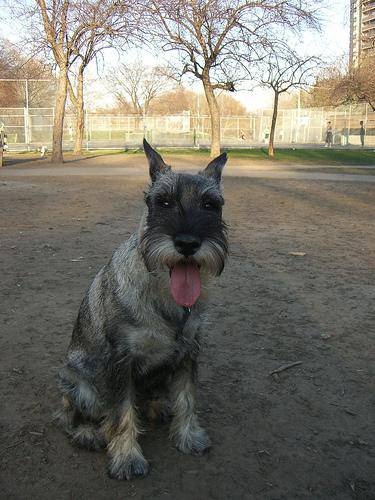

[('n02097209', 'standard_schnauzer', 0.54969054), ('n02097047', 'miniature_schnauzer', 0.42013124), ('n02097130', 'giant_schnauzer', 0.019662265)]


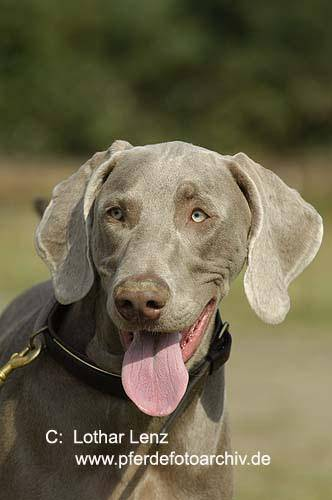

[('n02092339', 'Weimaraner', 0.9932509), ('n02099849', 'Chesapeake_Bay_retriever', 0.0026773193), ('n02109047', 'Great_Dane', 0.0013211669)]


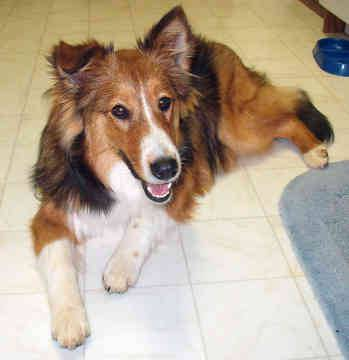

[('n02105855', 'Shetland_sheepdog', 0.9511068), ('n02106030', 'collie', 0.043800462), ('n02096294', 'Australian_terrier', 0.0012826624)]


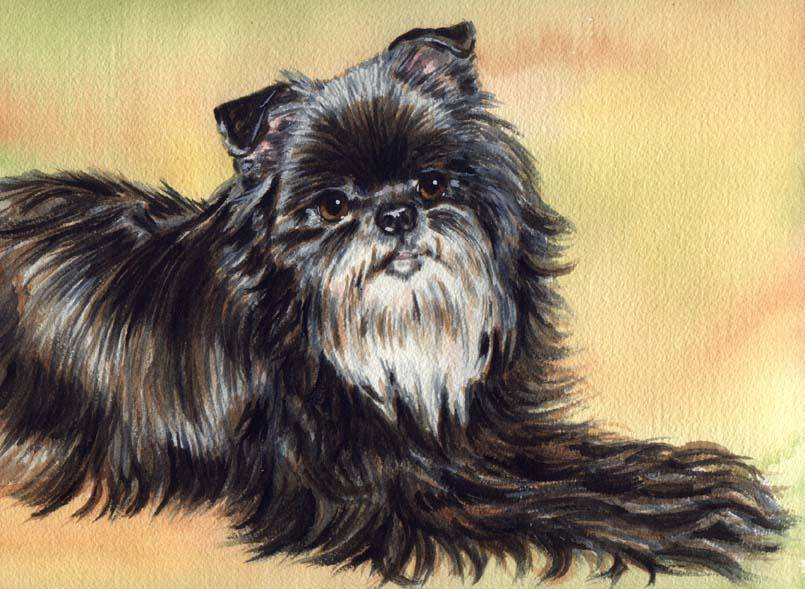

[('n02110627', 'affenpinscher', 0.90041286), ('n02112706', 'Brabancon_griffon', 0.059599847), ('n02086079', 'Pekinese', 0.008652862)]


In [8]:
import sys
# Add directory holding utility functions to path to allow importing
sys.path.append('../input/python-utility-code-for-deep-learning-exercises/utils')
from decode_predictions import decode_predictions

from IPython.display import Image, display

most_likely_labels = \
    decode_predictions(preds, top=3, 
                       class_list_path='../input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

# Now, it's my turn..

In [2]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

img_file = '../input/dog-breed-identification/dog_1.jpg'

img_height = image_size
img_width = image_size

# Loads an image into PIL format.
img = load_img(img_file, target_size=(img_height, img_width))

img_array = np.array([img_to_array(img)])
test_data = preprocess_input(img_array)



In [7]:
print(type(test_data))
print(test_data.shape)

<class 'numpy.ndarray'>
(1, 224, 224, 3)


In [3]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

preds = my_model.predict(test_data)

In [18]:
preds

array([[3.00065722e-10, 2.27226948e-08, 6.63436017e-09, 8.10584400e-09,
        5.57866242e-09, 4.55928939e-09, 1.14566543e-08, 2.07642827e-08,
        1.22464767e-08, 1.09357492e-08, 1.20475327e-08, 4.00562605e-09,
        6.61366517e-09, 7.38980832e-09, 4.40818049e-09, 5.45844925e-10,
        1.01666131e-09, 1.62027938e-08, 9.71651315e-10, 2.04129069e-08,
        6.85689727e-10, 9.89576421e-10, 1.86190192e-08, 7.37187662e-08,
        2.06168451e-08, 2.78570922e-09, 4.52510113e-10, 1.50676116e-09,
        2.26428742e-08, 1.19872041e-08, 4.84016272e-10, 2.49486689e-08,
        1.18728174e-08, 4.64098271e-09, 6.77961420e-09, 5.51627521e-10,
        1.03846318e-08, 1.21911263e-08, 5.30922417e-09, 1.60160418e-08,
        2.52730583e-08, 2.08845430e-09, 6.03482988e-08, 3.95940631e-08,
        6.54251364e-09, 1.72296666e-08, 1.19477379e-08, 8.13367507e-09,
        1.18656631e-08, 1.44714607e-09, 1.00338102e-08, 1.22793162e-08,
        1.59793334e-08, 9.09022191e-10, 2.39055042e-09, 1.378161

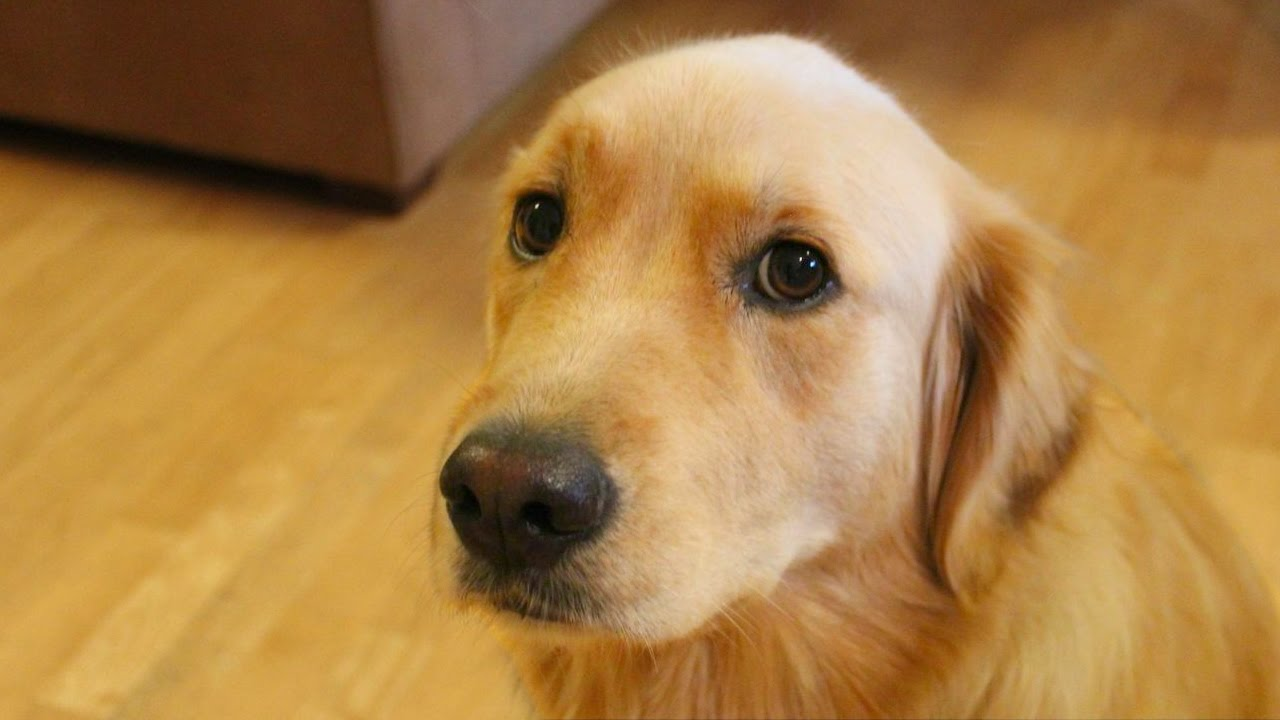

[('n02099601', 'golden_retriever', 0.9605005), ('n02099712', 'Labrador_retriever', 0.021571726), ('n02088094', 'Afghan_hound', 0.007474452)]


In [11]:
import sys
# Add directory holding utility functions to path to allow importing
sys.path.append('../input/python-utility-code-for-deep-learning-exercises/utils')
from decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = \
    decode_predictions(preds, top=3, 
                       class_list_path='../input/resnet50/imagenet_class_index.json')

display(Image(img_file))
print(most_likely_labels[0])

In [24]:
preds[0].argsort()[-3:][::-1]

array([207, 208, 160], dtype=int64)